In [40]:
import numpy as np
from scipy.linalg import eigh
import math
import matplotlib.pyplot as plt

def bar(num_elems) : 
    restrained_dofs = [0,]

    m = np.array([[2,1],[1,2]]) / (6. * num_elems)
    k = np.array([[1,-1],[-1,1]]) * float(num_elems)
    M = np.zeros((num_elems+1,num_elems+1))
    K = np.zeros((num_elems+1,num_elems+1))

    for i in range(num_elems):
        M_temp = np.zeros((num_elems+1,num_elems+1))
        K_temp = np.zeros((num_elems+1,num_elems+1))
        M_temp[i:i+2,i:i+2] = m 
        K_temp[i:i+2,i:i+2] = k
        M += M_temp
        K += K_temp

    for dof in restrained_dofs:
        for i in [0,1] :
            M = np.delete(M,dof,axis=i)
            K = np.delete(K,dof,axis=i)

    evals, evecs = eigh(K,M)
    frequencies = np.sqrt(evals)
    return M,K, frequencies, evecs

def pf(frequencies): 
    for i in range(len(frequencies)) :
        print("frequence propre ", i + 1," : ", np.round(frequencies[i],2)," Hz")

def analyse_error(N):
    exact_frequency = math.pi/2
    Err = []
    for i in range(1,N) : 
        M,K, frequencies, evecs = bar(i)
        error = (frequencies[0] - exact_frequency) / exact_frequency * 100.0
        Err.append(error)
        print(f'Nb element {i} :\n f1 = {np.round(frequencies[0],2)} Hz & erreur = {np.round(error,2)}%')
    print(f"frequence exacte = {np.round(exact_frequency,2)} Hz")
    plt.plot(range(1,N),Err,"o")
    plt.xlabel("Nombre d'elements")
    plt.ylabel("Erreur (%)")
    plt.grid()
    plt.show()

frequence propre  1  :  1.59  Hz
frequence propre  2  :  5.2  Hz
frequence propre  3  :  9.43  Hz
Nb element 1 :
 f1 = 1.73 Hz & erreur = 10.27%
Nb element 2 :
 f1 = 1.61 Hz & erreur = 2.59%
Nb element 3 :
 f1 = 1.59 Hz & erreur = 1.15%
Nb element 4 :
 f1 = 1.58 Hz & erreur = 0.64%
Nb element 5 :
 f1 = 1.58 Hz & erreur = 0.41%
Nb element 6 :
 f1 = 1.58 Hz & erreur = 0.29%
Nb element 7 :
 f1 = 1.57 Hz & erreur = 0.21%
Nb element 8 :
 f1 = 1.57 Hz & erreur = 0.16%
Nb element 9 :
 f1 = 1.57 Hz & erreur = 0.13%
Nb element 10 :
 f1 = 1.57 Hz & erreur = 0.1%
frequence exacte = 1.57 Hz


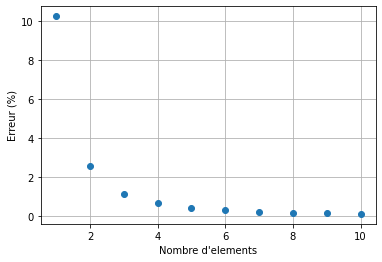

In [41]:
M,K, frequencies, evecs = bar(3)
pf(frequencies)
analyse_error(11)